In [ ]:
## Name : Lankagama L.S.
## Index Number : 190350F

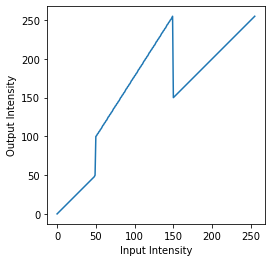

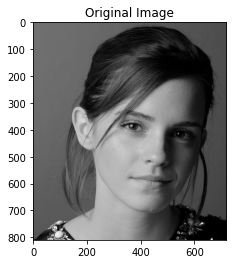

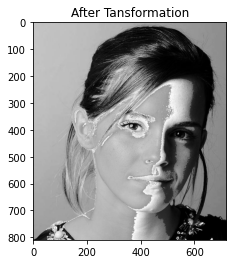

In [29]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt

f = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\Assignment\emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0 , 50, 50)
t2 = np.linspace(50 , 100, 0)
t3 = np.linspace(100 , 255, 100)
t4 = np.linspace(150 , 255, 0)
t5 = np.linspace(150 , 255, 106)

t = np.concatenate((t1, t2, t3, t4, t5), axis = 0).astype(np.uint8)
fig, ax = plt.subplots()
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
ax.plot(t)
ax.set_aspect("equal")
assert len(t) == 256
g = cv.LUT(f, t)

cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image", f)
cv.waitKey(0)
cv.imshow("Image", g)
cv.waitKey(0)
cv.destroyAllWindows()

Img = cv.cvtColor(f, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots()
plt.title("Original Image")
ax.imshow(Img)
plt.show()

img = cv.cvtColor(g , cv.COLOR_BGR2RGB)
fig, ax = plt.subplots()
plt.title("After Transformation")
ax.imshow(img)
plt.show()

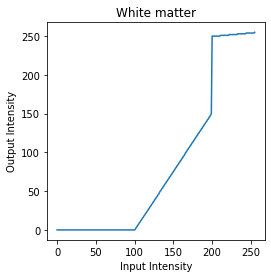

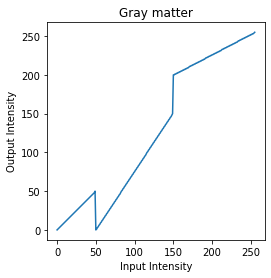

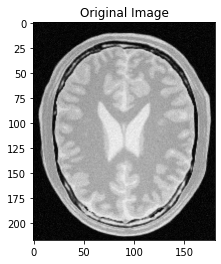

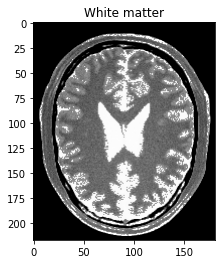

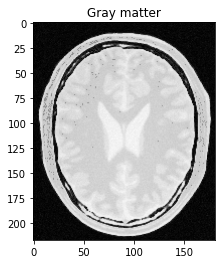

In [73]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt

f = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\Assignment\brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0, 0, 100)
t2 = np.linspace(100, 0, 0)
t3 = np.linspace(0, 150, 100)
t4 = np.linspace(150, 200, 0)
t5 = np.linspace(250, 255, 56)

t6 = np.linspace(0, 50, 50)
t7 = np.linspace(100, 0, 0)
t8 = np.linspace(0, 150, 100)
t9 = np.linspace(150, 200, 0)
t10 = np.linspace(200, 255, 106)

t_w = np.concatenate((t1, t2, t3, t4, t5), axis = 0).astype(np.uint8)
fig, ax = plt.subplots()
plt.title("White matter")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
ax.plot(t_w)
ax.set_aspect("equal")
assert len(t_w) == 256
g_w = cv.LUT(f, t_w)

t_g = np.concatenate((t6, t7, t8, t9, t10), axis = 0).astype(np.uint8)
fig, ax = plt.subplots()
plt.title("Gray matter")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
ax.plot(t_g)
ax.set_aspect("equal")
assert len(t_g) == 256
g_g = cv.LUT(f, t_g) 


cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image", f)
cv.waitKey(0)
cv.imshow("Image", g_w)
cv.waitKey(0)
cv.imshow("Image", g_g)
cv.waitKey(0)
cv.destroyAllWindows()

Img = cv.cvtColor(f, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots()
plt.title("Original Image")
ax.imshow(Img)
plt.show()

img = cv.cvtColor(g_w , cv.COLOR_BGR2RGB)
fig, ax = plt.subplots()
plt.title("White matter")
ax.imshow(img)
plt.show()

img = cv.cvtColor(g_g , cv.COLOR_BGR2RGB)
fig, ax = plt.subplots()
plt.title("Gray matter")
ax.imshow(img)
plt.show()

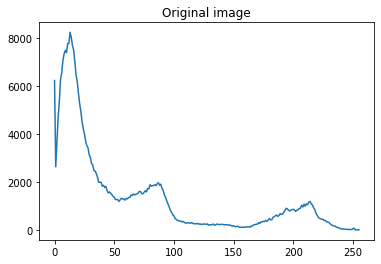

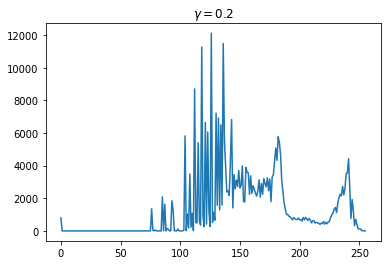

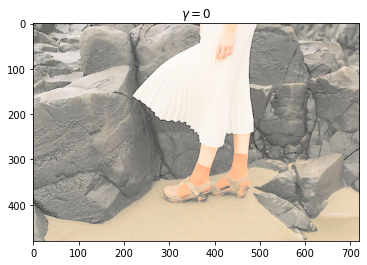

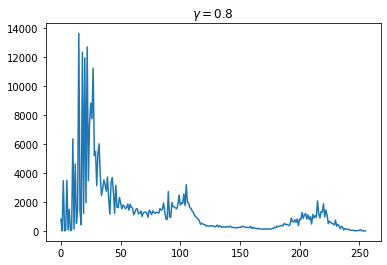

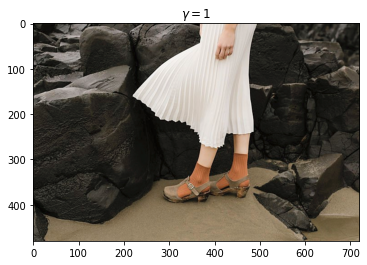

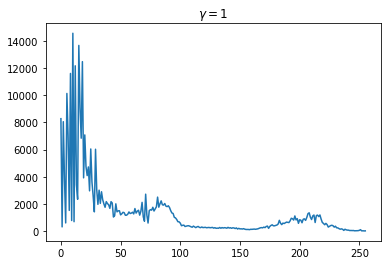

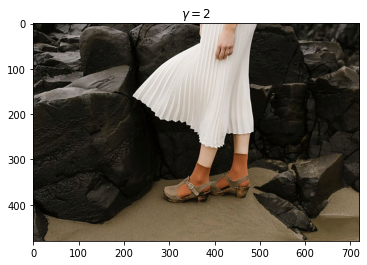

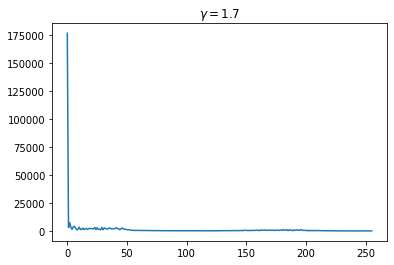

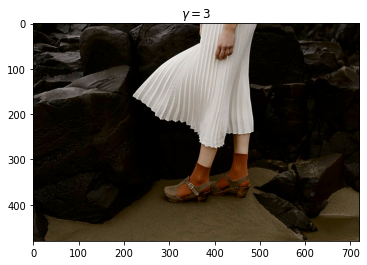

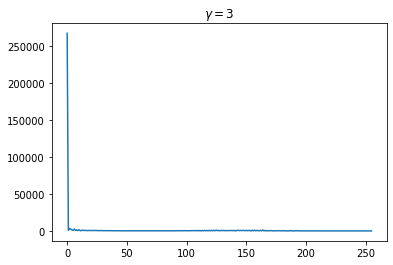

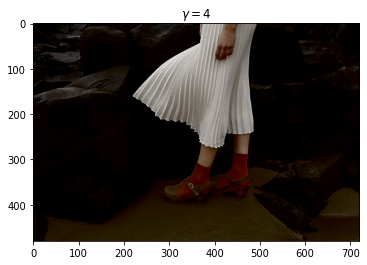

In [72]:
import numpy as np
import cv2 as cv 
import matplotlib.pyplot as plt

f = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\highlights_and_shadows.jpg", cv.IMREAD_COLOR)
assert f is not None
Lab = cv.cvtColor(f, cv.COLOR_BGR2LAB)

L, a, b = cv.split(Lab)
gamma = [0.2 , 0.8, 1, 1.7, 3]
hist_f = cv.calcHist([f], [0], None, [256], [0,256])

fig, ax = plt.subplots()
ax.plot(hist_f)
plt.title("Original image")

for i in range (0,5):
    t = np.array([(p/255.0)**gamma[i]*(255.0) for p in L]).astype(np.uint8)
    newLab = cv.merge([t,a,b])
    newf = cv.cvtColor(newLab, cv.COLOR_LAB2BGR)
    hist_newf = cv.calcHist([newf], [0], None, [256], [0,256])

    fig, ax = plt.subplots()
    ax.plot(hist_newf)
    plt.title("$\gamma = $"+ str(gamma[i]))

    img = cv.cvtColor(newf, cv.COLOR_BGR2RGB)
    fig, ax = plt.subplots()
    plt.title("$\gamma = $"+ str(i))
    ax.imshow(img)
    plt.show()

    
    cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
    cv.imshow("Image", newf)
    cv.waitKey(0)
    cv.destroyAllWindows()


5


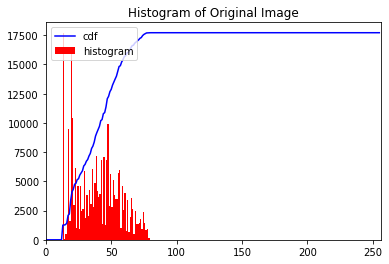

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [85]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\shells.png",cv.IMREAD_GRAYSCALE)
assert f is not None

def gethist_of(img):
    hist, bins = np.histogram(img.ravel(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(), 256, [0,256], color = 'r')
    plt.xlim([0,256])
    print(5)
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title("Histogram of Original Image")
    plt.show()

    cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
    cv.imshow(img)
    cv.waitKey(0)
    cv.destroyAllWindows()
    return 0


def getequaized_hist(img):
    equ = cv.equalizeHist(img)
    hist, bins = np.histogram(equ.ravel(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(equ.flatten(), 256, [0,256], color ='r')
    plt.xlim([0,256])
    plt.legend(('cdf', 'histogram'), loc = 'upper left')
    plt.title("Histogram of Equalized Image")
    plt.show()
    res = np.hstack((img,equ))
    plt.axis('off')
    plt.imshow(res, cmap = 'gray')

    cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
    cv.imshow(equ)
    cv.waitKey(0)
    cv.destroyAllWindows()

    return 0
gethist_of(f)
getequaized_hist(f)


